# Linear Models - a statistical Swiss Army Knife

## In this section

In this section we will learn:

- How variants of the familiar equation for a line (y = mx + b) underlie many different statistical models that you may have learned under different names.


## Prerequisites

To do the work in this section, you should already:
- Have Anaconda python installed
- Be able to open a Jupyter Notebook
- Be familiar with linear models and multiple linear models
- Be familiar with fitting linear models using `statsmodels` `OLS` regression.

## Table of Content

## Lining it all up - Linear Models, Linear Regression and the Equation for a Line

While statistics is incredibly diverse, and can be extremely complex, many statistical methods can be thought of as variations on a simple equation that you have no doubt already been introduced to: the equation for a line `y = mx + b`. 

In this section, we will discuss many of the statistical tests commonly taught in introductory statistics courses, and show how despite having unique names and histories, many common statistical tests, —ranging from T-tests to ANOVA —  can be seen as rooted in the equation for a line.

# A T-test as a linear model

Many common statistical tests can be thought of as special examples of linear models.

Let's use the Student's T-test as an example. T-tests compare measurements of samples in two categories to test the null hypothesis that they come from the same population (meaning that any apparent differences are really just due to chance). 

For example, if you measured the metabolic rate of larval vs. adult insects and saw a small difference, a T-test could let you tell whether that difference is likely to be explained by chance. 

Let's simulate some data to test this idea. We've already seen that data falling into two categories can be represented by using 1 to represent that a sample belongs to a category, with any 0 samples assumed to fall into the other. In our example, we could have 1 represent adult insects. If the only other measured category was larvae, then 0 values would represent larvae. (If we had 3 or more categories, we could have separate x values for two of them, with 0's in both x values representing membership in the 3rd category - this strategy is known as one-hot encoding).

Let's start by importing the libraries we'll need

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.formula.api as smf

In [21]:
 
def linear_simulation_of_two_categories(x_data,x2_data,slope,slope2,\
  interaction_slope,intercept = 0,error_stdev = 0):
    """Return y data given x data and parameters
    x_data -- a list of x data points (ints or floats)
    slope -- the slope of our linear model (m in y=mx+b+error)
    intercept -- the intercept of our linear model (b in y=mx+b+error)
    error -- the standard deviation of normal errors
    """
    y_predictions = []
    for i,x in enumerate(x_data):
        x2 = x2_data[i]
        error = np.random.normal(loc=0.0,scale = error_stdev,size = None)
        y = slope*x + slope2*x2 + x*x2*interaction_slope + intercept + error
        y_predictions.append(y)
        
    return y_predictions

In [22]:
def plot_colored_scatterplot(x,y,x2,true_y=None,colors =["orange","skyblue"],markers=["^","s"],\
  labels=["Skin Cell","Heart Cell"],xlabel="x",ylabel="y"):
    """Plot a colored scatterplot of x vs. y"""
    categories = np.array(x2)
    colormap = np.array(colors)
      
    for i,color in enumerate(colors):
            
        x_of_this_color = [curr_x for j,curr_x in enumerate(x) if x2[j] == i]
        y_of_this_color = [y[j] for j,x in enumerate(x) if x2[j]==i]
        
        curr_marker = markers[i]
        curr_label = labels[i]
        plt.scatter(x_of_this_color,y_of_this_color,c=color,marker=curr_marker,label=curr_label)
        
        if true_y:
            x_of_this_color = [curr_x for j,curr_x in enumerate(x) if x2[j] == i]
            true_y_of_this_color = [true_y[j] for j,x in enumerate(x) if x2[j]==i]
            plt.plot(x_of_this_color,true_y_of_this_color,"-",color=color)
            
    plt.xlabel(xlabel, size = "xx-large")
    plt.ylabel(ylabel, size = "xx-large")
    plt.legend()

Text(0.5, 0, 'Life Stage')

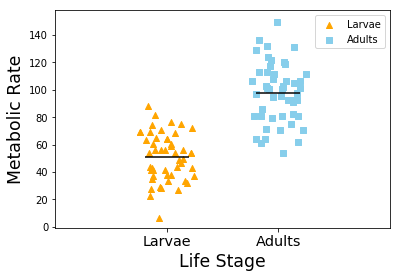

In [23]:
x =  [0,1]*50
x2 = x
observed_y = linear_simulation_of_two_categories(x_data = x,x2_data= x2,slope=0,\
  slope2=50.0,interaction_slope=0,intercept=50.0,error_stdev=20.0)


from random import random
from statistics import mean

jitter = 0.5
mean_marker_size = 2000
mean_marker_style = "_" # a horizontal line
mean_marker_color = "black"

jittered_x = [x + (random()-0.5)*jitter for x in x]
plot_colored_scatterplot(x=jittered_x,y=observed_y,x2=x2,labels=["Larvae","Adults"])

mean_x_larvae = mean([x for i,x in enumerate(x) if x2[i] == 0])
mean_y_larvae = mean([y for i,y in enumerate(observed_y) if x2[i] == 0])
plt.scatter(mean_x_larvae, mean_y_larvae,marker=mean_marker_style,s = mean_marker_size,c=mean_marker_color)

mean_x_adults = mean([x for i,x in enumerate(x) if x2[i] == 1])
mean_y_adults = mean([y for i,y in enumerate(observed_y) if x2[i] == 1])
plt.scatter(mean_x_adults, mean_y_adults,marker=mean_marker_style,s = mean_marker_size,c=mean_marker_color)



plt.xlim(-1,2)
plt.xticks([0,1],["Larvae","Adults"],size="x-large")

plt.ylabel("Metabolic Rate",size="xx-large")
plt.xlabel("Life Stage",size = "xx-large")

In [24]:
df = pd.DataFrame({"x":x,"y":observed_y,"x2":x2})
df.set_index("x")

model = smf.ols(formula='y ~ x2', data=df)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     141.8
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           9.45e-21
Time:                        16:33:30   Log-Likelihood:                -438.29
No. Observations:                 100   AIC:                             880.6
Df Residuals:                      98   BIC:                             885.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.2158      2.768     18.503      0.0

## Data with many categories can be represented as linear models

Just as we used linear models to represent categorical data when we had 2 categoies, we can similarly extend them to model data with any number of cateories. This is exactly the type of data that is typically analyzed with **ANOVA** (**an**alysis **o**f **va**riance). In introductory stats classes, ANOVA is typically one of the last techniques taught (if it is taught at all). It is usually described as a way to test for significant differneces when you have multiple different categorical values.

### Representing raw data and interactions using a design matrix

In order to best simulate multi-category data, we need to rearrange our simulation a little bit.
Previously, we've handled interaction effects by just multiplying together the raw input data (e.g. `x1 * x2 * interaction_slope`). In practice, most statistical software precalculates the product of interacting factors (i.e. x variables) ahead of time. It stores this product, along with all the individual `x`, `x2` and `y` measurements (or whatever other variables are in your model) in a large matrix called a **design matrix**. 
This matrix typically also includes a column of 1's representing your intercept. Why 1's? Because a slope &beta; times 1 will produce a contant intercept.

This probably sounds very complex, but may be a bit simpler with an example.

Let's say we have raw data:

`y = [20,21,22,123,124,125]
x = [0,1,2,3,4,5]
x2 = [0,0,0,1,1,1]
`

If we have model `y ~ x + x2` (a multiple linear model with no interactions), our design matrix would be:

| &beta;<sub>0</sub> 	| &beta;<sub>1</sub> 	| &beta;<sub>2</sub> 	|
|--------------------	|--------------------	|--------------------	|
|          1         	|          0         	|          0         	|
| 1                  	| 1                  	| 0                  	|
| 1                  	| 2                  	| 0                  	|
| 1                  	| 3                  	| 1                  	|
| 1                  	| 4                  	| 1                  	|
| 1                  	| 5                  	| 1                  	|


Read the table like this: &beta;<sub>0</sub> is our **intercept**, &beta;<sub>1</sub> is the slope on our first x variable (x<sub>1</sub>). &beta;<sub>2</sub> is our slope on the second x variable (x<sub>2</sub>).
    
To find a y value, you just multiply each the entry in each row by the corresponding &beta; value, and then sum up the result.

So for example, if we had an intercept of 0 we could set &beta<sub>0</sub> to 0, and the first column would add nothing to our final y value. If we had a slope of 10.0 for our first x variable x<sub>1</sub>, we would set &beta;<sub>1</sub> to 10.0, and each x<sub>1</sub> value would be multiplied by 10, and the result for the first row would be 0 * 10 = 0, while for the last row it would be 5 * 10 = 50.

**Try it out**. Using the design matrix up above, figure out the y values you would get if &beta;<sub>0</sub> = 20, &beta;<sub>1</sub> = 1.0, and &beta;<sub>3</sub> = 100. Compare them against the y-values up above. You should be able to get the same y-values.

*Whew*! That's a lot, right? There's just one more idea that will let us incorporate interaction effects (and many other fancy effects) into design matrices. If we want our equation to include some other effect (like an interaction effect), we precalculate the part of that effect that isn't hte slope and stick it in the matrix.

Taking our data above, let's say we want to test for an interaction effect between x<sub>1</sub> and x<sub>2</sub>. That interaction effect will be represented by its own slope &beta;<sub>3</sub>.

All we do is to take our raw data for x<sub>1</sub> and x<sub>2</sub>, multiply them together ahead of time, and stick them into the design matrix as their own column:

| &beta;<sub>0</sub> 	| &beta;<sub>1</sub> 	| &beta;<sub>2</sub> 	| &beta;<sub>3</sub> 	|
|--------------------	|--------------------	|--------------------	|--------------------	|
|          1         	|          0         	|          0         	| 0                  	|
| 1                  	| 1                  	| 0                  	| 0                  	|
| 1                  	| 2                  	| 0                  	| 0                  	|
| 1                  	| 3                  	| 1                  	| 3                  	|
| 1                  	| 4                  	| 1                  	| 4                  	|
| 1                  	| 5                  	| 1                  	| 5                  	|

Note that the first three entries of the interaction column are 0's because x<sub>2</sub> is 0 for the first three entries (i.e. 0 * x = 0). All the rest are the same as x<sub>1</sub> because x<sub>2</sub> is 1 for those entries (and 1 * x = x).

Hopefully now that we've walked through what these design matrices are, they will sound slightly less intimidating than they first appear.



### Building design matrices in python

In python, the `patsy` library helps build design matrices using a `pandas` dataframe, and an equation for the model you would like to represent. These design matrices can then be input into statistical software like `statsmodels` to conduct regression analysis.

In [27]:
from patsy import dmatrices, dmatrix
from numpy import array

def linear_simulation_of_many_categories(data,equation,slopes,ylabel="y",error_stdev = 10.0):
    """Return dict or dataframe data with y-values added 
    
    data -- a dict or DataFrame of data 
    
    slopes -- an array of parameters (p) in our linear model with dimensions p x 1.
     Note that in y=mx+b+error, both the slope m and the intercept b are fit parameters
     Depending on how the equaiton is written, these are the same as beta values/coefficients.
    
    
    error -- the standard deviation of normal errors
    """
    design_matrix = dmatrix(equation,data)
    
    slopes = array(slopes) #make sure these are an array if they were originally a list
    y_predictions = design_matrix.dot(slopes)  #note this is now matrix multiplication 
    
    
    #Add normal errors
    errors = np.random.normal(loc=0.0,scale = error_stdev,size = len(y_predictions))
    y_observations = y_predictions + errors
    
    data[ylabel] = y_observations
        
    return data

from random import randint
N = 100
species = array(["red"]*int(N/2) + ["blue"]*int(N/2))
age = array([randint(1,10) for i in range(100)])
sex = array(["male","female"]*int(N/2))
data = pd.DataFrame({"age":age,"sex":sex,"species":species})

data = linear_simulation_of_many_categories(data,"species + age + sex + age:sex",\
                                            ylabel ="aggression",slopes=array([30.0,200.0,-5.0,100,-10]))
print(data)

    age     sex species   aggression
0     6    male     red   767.155843
1    10  female     red  1223.896199
2     2    male     red   413.585874
3     2  female     red   421.842187
4     8    male     red   950.578957
5     5  female     red   740.844341
6     3    male     red   492.372460
7     4  female     red   626.542838
8     5    male     red   665.022538
9     1  female     red   332.790272
10    7    male     red   865.855805
11    5  female     red   734.868616
12    6    male     red   776.743053
13    1  female     red   326.301098
14    2    male     red   389.190782
15    7  female     red   931.010950
16   10    male     red  1118.586139
17    3  female     red   531.498614
18    2    male     red   406.198030
19    2  female     red   436.422032
20   10    male     red  1114.074920
21    4  female     red   621.853709
22   10    male     red  1116.136752
23    6  female     red   826.892398
24    9    male     red  1041.146158
25   10  female     red  1232.416998
2

Now let's plot our multi-category data:

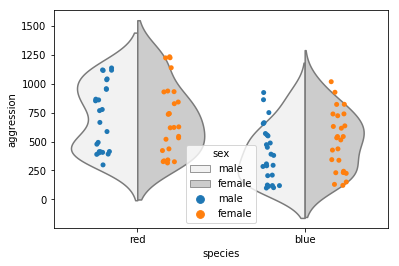

In [28]:
import seaborn as sns
ax = sns.violinplot(x="species", y="aggression", hue="sex",dodge=True, lw=2, split=True, data=data, inner=None, color=".8")
ax = sns.stripplot(x="species", y="aggression", hue="sex",dodge=True,lw=3, edgecolor="black", data=data)


## Summary

- T-tests can be represented as a linear model, where the x variable is 0 if the observation is in the first category and 1 if it is in the second.









## Exercises

**Exercise 1**. Describe a T-test.

**Excercise 2**. Describe how a T-test can be thought of as a special type of linear model.

## Reading Responses & Feedback 

^Make this a hyperlink using Google Forms

## References & Further Reading

Jonas Kristoffer Lindeløv, "Common statistical tests are linear models". This outstanding python notebook inspired the discussion in this chapter. Check it out [here](https://eigenfoo.xyz/tests-as-linear/)!

StatTrek, "Interaction Effects in Statistics". This page has a nice summary of interaction effects(https://stattrek.com/multiple-regression/interaction.aspx#:~:text=In%20regression%2C%20an%20interaction%20effect,or%20more%20other%20independent%20variables.)

Russell A. Poldrack, *Statistical Thinking in the 21st Century*. https://statsthinking21.github.io/statsthinking21-core-site/fitting-models.html 

The Method of Maximum Likelihood for Simple Linear Regression
https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf

